## House Price Prediction using Ridge and Lasso regression

#### Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and 
flip them on at a higher price. For the same purpose, the company has collected a data set 
from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. 
You are required to build a regression model using regularisation in order to 
predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Reading and understanding the data

In [176]:
# Importing important libraries

import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [177]:
# Reading the given dataset

Housing = pd.read_csv('train.csv')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [178]:
# Checking number of rows and columns in dataset

Housing.shape

(1460, 81)

In [179]:
# Checking column wise information 

Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [180]:
# Checking Numerical attributes of columns

Housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [181]:
# Dropping `ID` column

Housing = Housing.drop('Id', axis = 1)

In [182]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
# Checking missing values form dataset

(Housing.isnull().sum()).sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

In [184]:
# Checking missing value percentages in the dataset

missing_val = 100 * (Housing.isnull().sum()/len(Housing))

missing_val.sort_values(ascending = False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
RoofMatl         0.000000
dtype: float64

#### Dropping columns in which missing values are greater than 40%

In [185]:
Housing = Housing.loc[:,(Housing.isnull().sum()/len(Housing)) < 0.4]
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [186]:
(100*(Housing.isnull().sum()/len(Housing))).sort_values(ascending= False).head(15)

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Exterior1st      0.000000
dtype: float64

## 2. Data Cleaning
### 2.1  Missing values

### 2.1.1 Missing value Treatment : `LotFrontage`

In [187]:
# Missing value treatment for colum,n: LotFrontage 

Housing['LotFrontage'].isnull().sum()

259

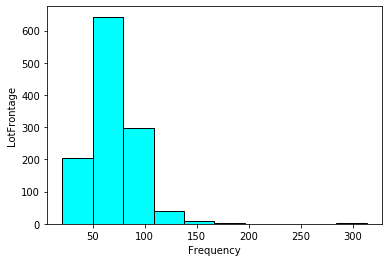

In [188]:
# Plotting Histogram for column 'LotFrontage'

plt.hist(Housing['LotFrontage'],color = 'cyan', edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('LotFrontage')
plt.show()

In [189]:
# Checking numerical aspects of column 'LotFrontage'

Housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [190]:
# Imputing missing values with median value, as we have outliers in the column 'LotFrontage'

med_LotFrontage = Housing['LotFrontage'].median()
med_LotFrontage

69.0

In [191]:
Housing['LotFrontage'] = Housing['LotFrontage'].replace(np.nan, med_LotFrontage)

In [192]:
Housing['LotFrontage'].isnull().sum()

0

### 2.1.2 Missing value Treatment : `GarageFinish`

In [193]:
Housing['GarageFinish'].isnull().sum()

81

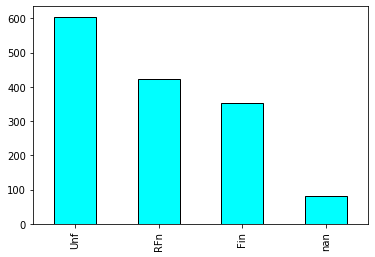

In [194]:
Housing['GarageFinish'].value_counts(dropna =False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [195]:
Housing['GarageFinish'].value_counts(dropna =False)/len(Housing['GarageFinish'])*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64

In [196]:
# Checking Mode of categorical column 'GarageFinish' for missing value imputation

mode_finish = Housing['GarageFinish'].mode()[0]
mode_finish

'Unf'

In [197]:
Housing['GarageFinish'] = Housing['GarageFinish'].replace(np.nan, mode_finish)

In [198]:
Housing['GarageFinish'].isnull().sum()

0

### 2.1.3 Missing value Treatment : `GarageType`

In [199]:
Housing['GarageType'].isnull().sum()

81

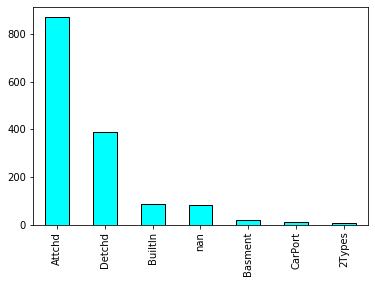

In [200]:
Housing['GarageType'].value_counts(dropna = False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [201]:
Housing['GarageType'].value_counts(dropna = False)/ len(Housing['GarageType'])*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NaN         5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [202]:
# Checking Mode of categorical column 'GarageType' for missing value imputation

mode_Type= Housing['GarageType'].mode()[0]

In [203]:
Housing['GarageType'] = Housing['GarageType'].replace(np.nan, mode_Type)

In [204]:
Housing['GarageType'].isnull().sum()

0

### 2.1.4 Missing value Treatment : `GarageCond`

In [205]:
Housing['GarageCond'].isnull().sum()

81

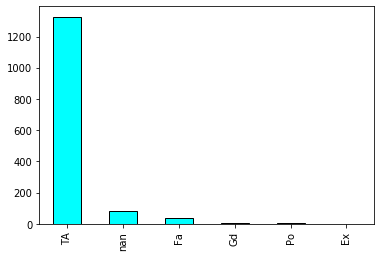

In [206]:
Housing['GarageCond'].value_counts(dropna =False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [207]:
Housing['GarageCond'].value_counts(dropna= False)/len(Housing['GarageCond'])*100

TA     90.821918
NaN     5.547945
Fa      2.397260
Gd      0.616438
Po      0.479452
Ex      0.136986
Name: GarageCond, dtype: float64

In [208]:
# Here approximately 95% of information is describe by level 'TA' and missing values. So Dropping 'GarageCond' column

Housing = Housing.drop('GarageCond', axis = 1)

In [209]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 2.1.5 Missing value Treatment : `GarageQual`

In [210]:
Housing['GarageQual'].isnull().sum()

81

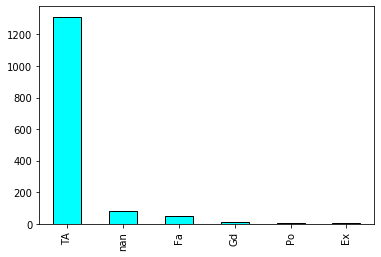

In [211]:
Housing['GarageQual'].value_counts(dropna =False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [212]:
(Housing['GarageQual'].value_counts(dropna =False)/ len(Housing['GarageQual']))*100

TA     89.794521
NaN     5.547945
Fa      3.287671
Gd      0.958904
Po      0.205479
Ex      0.205479
Name: GarageQual, dtype: float64

In [213]:
# Here approximately 94% of information is describe by level 'TA' and missing values. So Dropping 'GarageQual' column

Housing = Housing.drop('GarageQual', axis = 1)
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 2.1.6 Missing value Treatment : `GarageYrBlt`

In [214]:
Housing['GarageYrBlt'].isnull().sum()

81

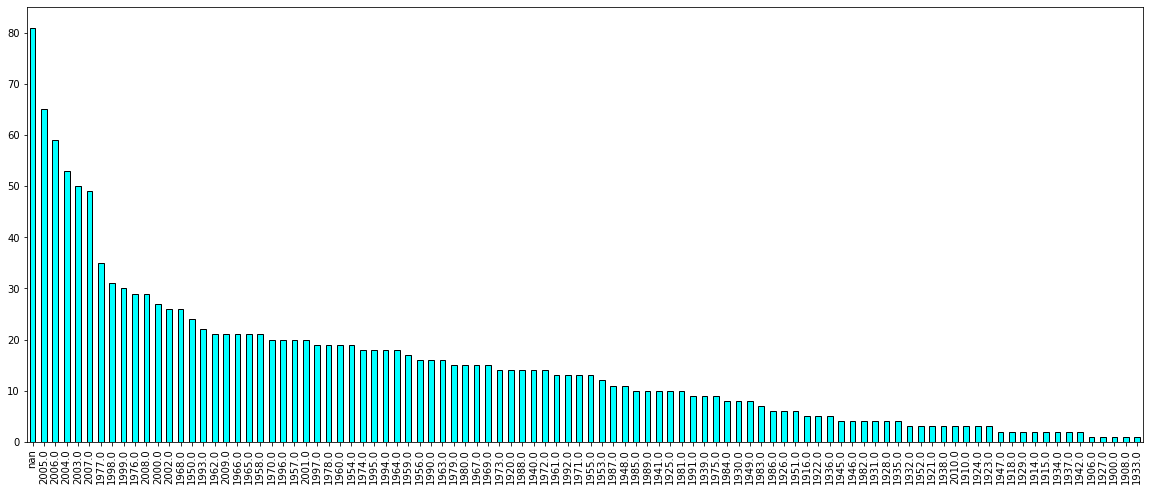

In [215]:
Housing['GarageYrBlt'].value_counts(dropna= False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black', figsize = (20,8))

In [216]:
Housing['GarageYrBlt'].value_counts(dropna= False).head(10)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
Name: GarageYrBlt, dtype: int64

In [217]:
# Dropping missing rows

Housing = Housing[~Housing['GarageYrBlt'].isnull()].copy()

In [218]:
Housing['GarageYrBlt'].isnull().sum()

0

### 2.1.7 Missing value Treatment : `BsmtExposure`

In [219]:
Housing['BsmtExposure'].isnull().sum()

31

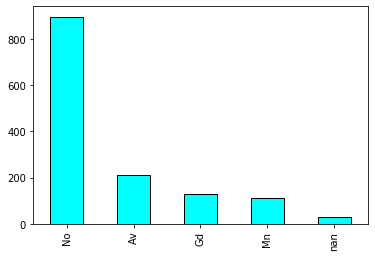

In [220]:
Housing['BsmtExposure'].value_counts(dropna = False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [221]:
100*(Housing['BsmtExposure'].value_counts(dropna = False)/len(Housing))

No     64.974619
Av     15.445975
Gd      9.282088
Mn      8.049311
NaN     2.248006
Name: BsmtExposure, dtype: float64

In [222]:
# Checking Mode of categorical column 'BsmtExposure' for missing value imputation

mode_bsmt = Housing['BsmtExposure'].mode()[0]
mode_bsmt

'No'

In [223]:
Housing['BsmtExposure'] = Housing['BsmtExposure'].replace(np.nan, mode_bsmt)

In [224]:
Housing['BsmtExposure'].isnull().sum()

0

### 2.1.8 Missing value Treatment : `BsmtFinType2`

In [225]:
Housing['BsmtFinType2'].isnull().sum()

31

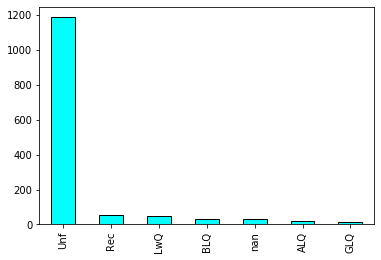

In [226]:
Housing['BsmtFinType2'].value_counts(dropna = False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [227]:
(Housing['BsmtFinType2'].value_counts(dropna = False)/len(Housing['BsmtFinType2']))*100

Unf    86.004351
Rec     3.843365
LwQ     3.335751
BLQ     2.320522
NaN     2.248006
ALQ     1.377810
GLQ     0.870196
Name: BsmtFinType2, dtype: float64

In [228]:
# Here approximately 88% of information is describe by level 'Unf' and missing values. So Dropping 'BsmtFinType2' column

Housing = Housing.drop('BsmtFinType2', axis= 1)

In [229]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 2.1.9 Missing value Treatment : `BsmtFinType1`

In [230]:
Housing['BsmtFinType1'].isnull().sum()

30

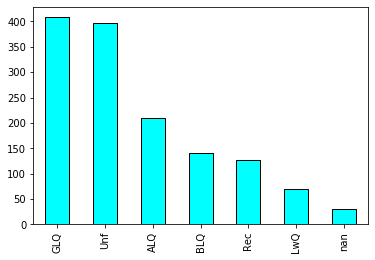

In [231]:
Housing['BsmtFinType1'].value_counts(dropna = False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [232]:
(Housing['BsmtFinType1'].value_counts(dropna = False)/len(Housing['BsmtFinType1']))*100

GLQ    29.586657
Unf    28.716461
ALQ    15.155910
BLQ    10.224801
Rec     9.137056
LwQ     5.003626
NaN     2.175489
Name: BsmtFinType1, dtype: float64

In [233]:
# Checking Mode of categorical column 'BsmtFinType2' for missing value imputation

mode_bsmt_fin1 = Housing['BsmtFinType1'].mode()[0]
mode_bsmt_fin1

'GLQ'

In [234]:
Housing['BsmtFinType1'] = Housing['BsmtFinType1'].replace(np.nan, mode_bsmt_fin1)

In [235]:
Housing['BsmtFinType1'].isnull().sum()

0

### 2.1.10 Missing value Treatment :`BsmtCond`

In [236]:
Housing['BsmtCond'].isnull().sum()

30

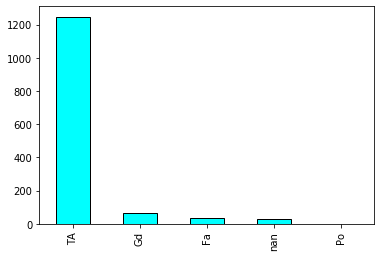

In [237]:
Housing['BsmtCond'].value_counts(dropna = False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [238]:
(Housing['BsmtCond'].value_counts(dropna = False)/len(Housing['BsmtCond']))*100

TA     90.427846
Gd      4.568528
Fa      2.755620
NaN     2.175489
Po      0.072516
Name: BsmtCond, dtype: float64

In [239]:
# Here approximately 92% of information is describe by level 'TA' and missing values. So Dropping 'BsmtCond' column

Housing = Housing.drop('BsmtCond', axis= 1)

In [240]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 2.1.11 Missing value Treatment :`BsmtQual`

In [241]:
Housing['BsmtQual'].isnull().sum()

30

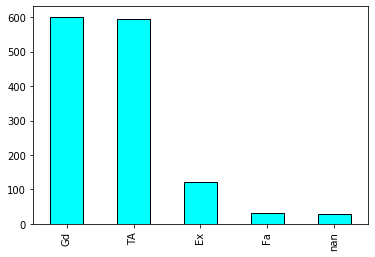

In [242]:
Housing['BsmtQual'].value_counts(dropna = False).plot(kind = 'bar', color = 'cyan', edgecolor = 'black')

In [243]:
(Housing['BsmtQual'].value_counts(dropna = False)/len(Housing['BsmtQual']))*100

Gd     43.582306
TA     43.147208
Ex      8.774474
Fa      2.320522
NaN     2.175489
Name: BsmtQual, dtype: float64

In [244]:
# Checking Mode of categorical column 'BsmtQual' for missing value imputation

mode_BsmtQual = Housing['BsmtQual'].mode()[0]
mode_BsmtQual

'Gd'

In [245]:
Housing['BsmtQual'] = Housing['BsmtQual'].replace(np.nan, mode_BsmtQual)

In [246]:
Housing['BsmtQual'].isnull().sum()

0

### 2.1.12 Missing value Treatment : `MasVnrArea, MasVnrType, Electrical`       

In [247]:
Housing = Housing.dropna(axis = 0, how= 'any')

In [248]:
Housing.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

##  2.2 Data Cleaning
- Dropping skewed columns whose one level is more than 85% of total value count

85% of total value count = .85 X (total value count)

85% of total value count = .85 X 1460

85% of total value count = 1241

In [249]:
Housing.shape

(1370, 71)

In [250]:
def skewed_col():
    col = []
    f_cate = Housing.select_dtypes(include = 'object')
    
    for i in f_cate:
        if ((Housing[i].value_counts().max()) >= 1241):
            col.append(i)
    return col

col_to_drop = skewed_col()

print(col_to_drop)


['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'PavedDrive']


In [251]:
Housing = Housing.drop(col_to_drop, axis= 1)

In [252]:
Housing.shape

(1370, 61)

In [253]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## 2.3 Data Cleaning : 
- For columns YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

### 2.3.1 Column `YearBuilt`

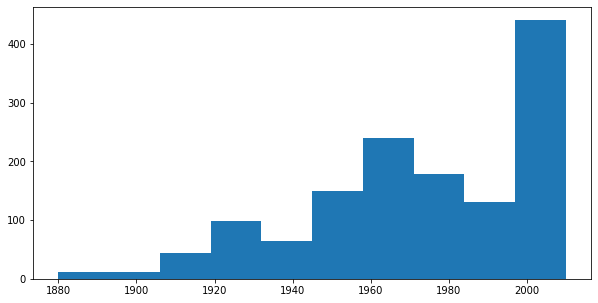

In [254]:
# Column YearBuilt
plt.figure(figsize = (10,5))
plt.hist(Housing['YearBuilt'])
plt.show()

In [255]:
# Lets check recent Year in column 'YearBuilt'

Housing['YearBuilt'].max()

2010

In [256]:
# Creating column Years built from 2010

Housing['YrBuilt_2010'] = Housing['YearBuilt'].max() - Housing['YearBuilt']

In [257]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrBuilt_2010
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,7
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,34
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,9
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,95
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,10


### 2.3.2 Column  `YearRemodAdd`

In [258]:
# For column 'YearRemodAdd' we will convert it to 1 as yes and 0 as no 

def YearRemodAdd_check(x):
    if (x['YearBuilt'] == x['YearRemodAdd']):
        return 0
    else:
        return 1

Housing['Remodelled'] = Housing.apply(YearRemodAdd_check, axis = 1)

In [259]:
Housing['Remodelled'].value_counts()

0    734
1    636
Name: Remodelled, dtype: int64

In [260]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrBuilt_2010,Remodelled
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,7,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,34,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,9,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,95,1
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,10,0


In [261]:
Housing['Remodelled'].value_counts()

0    734
1    636
Name: Remodelled, dtype: int64

### 2.3.3 Column `GarageYrBlt`

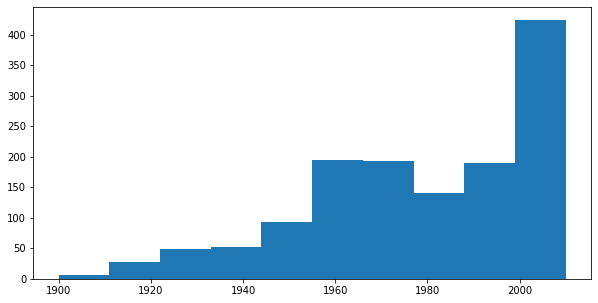

In [262]:
# Column GarageYrBlt
plt.figure(figsize = (10,5))
plt.hist(Housing['GarageYrBlt'])
plt.show()

In [263]:
# Lets check recent Year in column 'GarageYrBlt'

Housing['GarageYrBlt'].max()

2010.0

In [264]:
# Creating column Years built from 2010

Housing['GarageYrBlt_2010'] = Housing['GarageYrBlt'].max() - Housing['GarageYrBlt']
Housing['GarageYrBlt_2010'] = Housing['GarageYrBlt_2010'].astype(int)

In [265]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,7,0,7
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,34,0,34
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,9,1,9
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,95,1,12
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,10,0,10


### 2.3.4 Column `YrSold`

In [266]:
Housing['YrSold'].value_counts()

2009    322
2007    310
2006    298
2008    277
2010    163
Name: YrSold, dtype: int64

In [267]:
# Creating column for Age of property as 'Property_age'

def Property_age_check(x):
    if (x['YearBuilt'] == x['YearRemodAdd']):
        return (x['YrSold'] - x['YearBuilt'])
    else:
        return (x['YrSold'] - x['YearRemodAdd'])

Housing['Property_age']  = Housing.apply(Property_age_check, axis =1)   

In [268]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,7,0,7,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,34,0,34,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,9,1,9,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,95,1,12,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,10,0,10,8


In [269]:
# Dropping columns YearBuilt, YearRemodAdd, GarageYrBlt, YrSold as we have created derived columns from them.

Housing = Housing.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)

In [270]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,WD,Normal,208500,7,0,7,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,WD,Normal,181500,34,0,34,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,WD,Normal,223500,9,1,9,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,1,12,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,250000,10,0,10,8


## 2.4 Data Cleaning

- Checking for Outliers

In [271]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,WD,Normal,208500,7,0,7,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,WD,Normal,181500,34,0,34,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,WD,Normal,223500,9,1,9,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,1,12,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,250000,10,0,10,8


In [272]:
# Selecting numerical columns

num_Hou = Housing.select_dtypes(exclude = 'object')
num_Hou.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,7,0,7,5
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,34,0,34,31
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,9,1,9,6
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,95,1,12,36
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,10,0,10,8


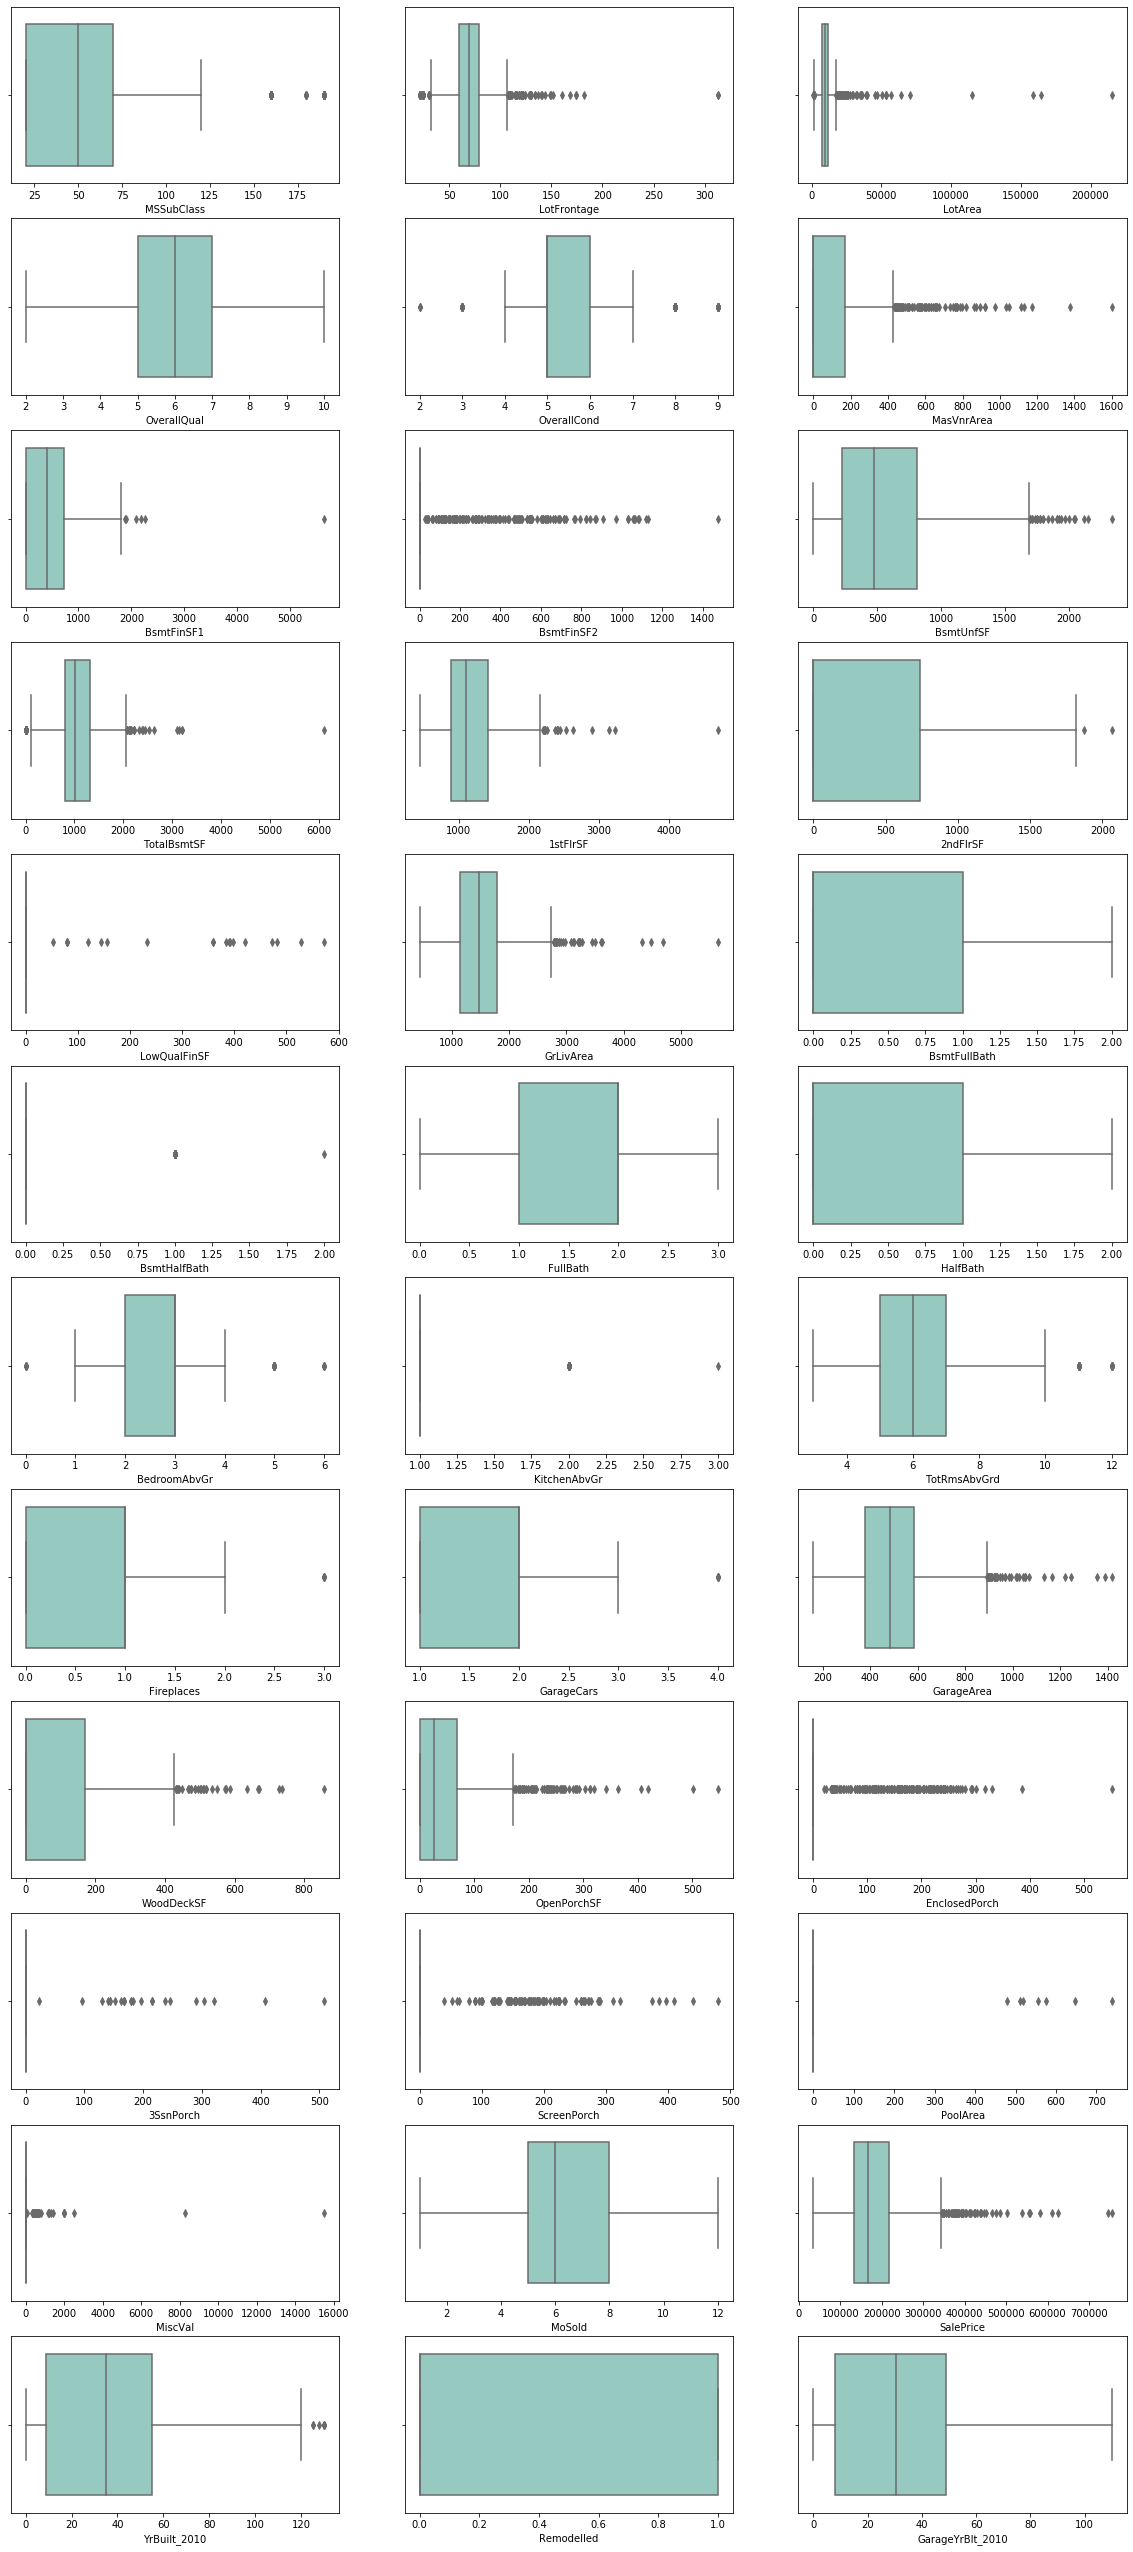

In [273]:
# Plotting boxplot for univeriate analysis

plt.figure(figsize = (20, 50))
f = num_Hou.columns[:-1]
for  i in enumerate(f):
    plt.subplot(13,3,i[0]+1)
    sns.boxplot(num_Hou[i[-1]], palette='Set3')

#### From above boxplots we need to treat outliers of column: 

In [274]:
Housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,56.054745,70.359854,10687.435036,6.181752,5.582482,109.076642,454.211679,48.418248,570.742336,1073.372263,1176.086131,353.202190,4.162044,1533.450365,0.429197,0.059124,1.577372,0.394161,2.865693,1.037956,6.551825,0.641606,1.869343,500.462774,97.656204,47.028467,21.031387,3.633577,16.050365,2.940146,43.170803,6.331387,185194.797080,37.216058,0.464234,31.646715,22.484672
std,41.073531,21.958584,10228.507006,1.344236,1.081480,184.589326,458.985739,164.817484,444.050989,435.558797,385.381717,439.497524,40.260837,519.489200,0.513963,0.239019,0.547455,0.502116,0.782985,0.194944,1.590884,0.644711,0.631307,185.988074,126.805998,64.995049,60.519492,30.252215,57.422820,41.470515,503.247977,2.693166,78899.705642,29.371056,0.498901,24.685798,20.443765
min,20.000000,21.000000,1300.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35311.000000,0.000000,0.000000,0.000000,-1.000000
25%,20.000000,60.000000,7731.000000,5.000000,5.000000,0.000000,0.000000,0.000000,225.500000,808.500000,894.000000,0.000000,0.000000,1152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,133925.000000,9.000000,0.000000,8.000000,4.000000
50%,50.000000,69.000000,9591.000000,6.000000,5.000000,0.000000,399.500000,0.000000,477.500000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,167000.000000,35.000000,0.000000,30.500000,14.000000
75%,70.000000,79.000000,11712.750000,7.000000,6.000000,171.750000,728.000000,0.000000,811.000000,1314.000000,1414.000000,737.000000,0.000000,1788.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,582.750000,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,217875.000000,55.000000,1.000000,49.000000,40.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,130.000000,1.000000,110.000000,60.000000


In [275]:
Housing.quantile([0.01,0.05 ,0.5,0.7,0.9,0.95,0.98,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
0.01,20.0,21.00,1883.49,3.0,3.0,0.00,0.00,0.00,0.00,0.00,523.45,0.00,0.00,750.45,0.0,0.0,1.0,0.0,1.0,1.0,4.00,0.0,1.0,191.07,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.0,74380.00,1.00,0.0,1.0,0.0
0.05,20.0,36.45,3369.75,4.0,4.0,0.00,0.00,0.00,0.00,540.00,687.35,0.00,0.00,864.00,0.0,0.0,1.0,0.0,2.0,1.0,4.00,0.0,1.0,240.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,2.0,97725.00,3.00,0.0,3.0,0.0
0.50,50.0,69.00,9591.00,6.0,5.0,0.00,399.50,0.00,477.50,1008.00,1098.00,0.00,0.00,1479.00,0.0,0.0,2.0,0.0,3.0,1.0,6.00,1.0,2.0,484.00,0.00,27.00,0.00,0.0,0.00,0.0,0.0,6.0,167000.00,35.00,0.0,30.5,14.0
0.70,60.0,75.00,11211.20,7.0,6.0,130.60,661.30,0.00,736.90,1234.30,1332.60,677.30,0.00,1716.30,1.0,0.0,2.0,1.0,3.0,1.0,7.00,1.0,2.0,572.00,150.00,59.00,0.00,0.0,0.00,0.0,0.0,7.0,202549.50,51.00,1.0,45.0,36.0
0.90,120.0,92.00,14573.30,8.0,7.0,340.00,1074.40,127.10,1237.30,1614.20,1686.10,975.00,0.00,2169.30,1.0,0.0,2.0,1.0,4.0,1.0,9.00,1.0,3.0,770.20,264.00,130.00,108.00,0.0,0.00,0.0,0.0,10.0,281383.90,84.00,1.0,65.0,56.0
0.95,160.0,104.00,17501.65,8.0,8.0,461.75,1275.65,406.05,1475.50,1753.00,1837.10,1146.95,0.00,2470.75,1.0,1.0,2.0,1.0,4.0,1.0,10.00,2.0,3.0,856.55,341.10,171.10,180.00,0.0,166.65,0.0,0.0,11.0,334175.60,90.55,1.0,80.0,58.0
0.98,160.0,120.62,25318.86,9.0,8.0,657.34,1446.24,669.24,1676.20,2001.24,2071.48,1320.00,0.00,2780.58,1.0,1.0,3.0,1.0,4.0,2.0,10.62,2.0,3.0,910.48,434.10,240.62,236.00,0.0,224.00,0.0,500.0,12.0,395119.04,100.00,1.0,90.0,59.0
0.99,190.0,134.93,39410.90,10.0,9.0,802.20,1583.23,849.68,1796.55,2175.98,2218.86,1417.72,127.44,3120.68,1.0,1.0,3.0,1.0,5.0,2.0,11.00,2.0,3.0,1015.86,509.62,282.93,260.55,168.0,271.62,0.0,700.0,12.0,441940.91,110.00,1.0,94.0,60.0


#### Performing soft capping on columns

In [276]:
# Column LotArea

q99 = Housing['LotArea'].quantile(0.99)

Housing = Housing[Housing['LotArea'] < q99]

# Column MasVnrArea

q99 = Housing['MasVnrArea'].quantile(0.99)

Housing = Housing[Housing['MasVnrArea'] < q99]

# Column TotalBsmtSF

q99 = Housing['TotalBsmtSF'].quantile(0.99)

Housing = Housing[Housing['TotalBsmtSF'] < q99]

# Column WoodDeckSF

q99 = Housing['WoodDeckSF'].quantile(0.99)

Housing = Housing[Housing['WoodDeckSF'] < q99]

# Column OpenPorchSF

q99 = Housing['OpenPorchSF'].quantile(0.99)

Housing = Housing[Housing['OpenPorchSF'] < q99]

In [277]:
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,WD,Normal,208500,7,0,7,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,WD,Normal,181500,34,0,34,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,WD,Normal,223500,9,1,9,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,1,12,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,250000,10,0,10,8


### 2.4.1 Checking Dataset

In [278]:
 # Checking number of rows and columns in dataset 

Housing.shape

(1300, 61)

In [279]:
# Checking column wise information

Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1458
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1300 non-null   int64  
 1   MSZoning          1300 non-null   object 
 2   LotFrontage       1300 non-null   float64
 3   LotArea           1300 non-null   int64  
 4   LotShape          1300 non-null   object 
 5   LandContour       1300 non-null   object 
 6   LotConfig         1300 non-null   object 
 7   Neighborhood      1300 non-null   object 
 8   Condition1        1300 non-null   object 
 9   BldgType          1300 non-null   object 
 10  HouseStyle        1300 non-null   object 
 11  OverallQual       1300 non-null   int64  
 12  OverallCond       1300 non-null   int64  
 13  RoofStyle         1300 non-null   object 
 14  Exterior1st       1300 non-null   object 
 15  Exterior2nd       1300 non-null   object 
 16  MasVnrType        1300 non-null   object 


In [280]:
# Checking missing values form dataset

Housing.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
GarageType          0
GarageFinish        0
GarageCars          0
GarageArea

In [281]:
# Determine the percentage of data retained

num_data = round(100*(len(Housing)/1460),2)
print('Data Retained :', num_data )

Data Retained : 89.04


## 3. Data Visualization

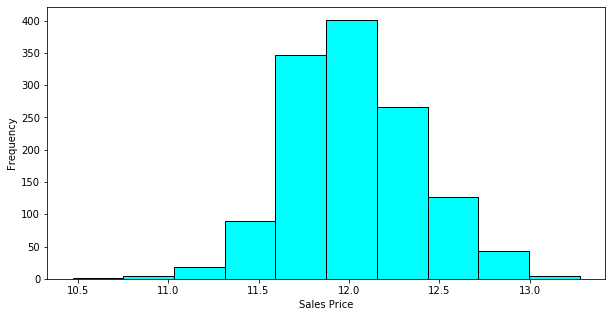

In [282]:
# Target variable - SalePrice
Housing['SalePrice'] = np.log1p(Housing['SalePrice'])

plt.figure(figsize = (10,5))
plt.hist(Housing['SalePrice'], color = 'cyan', edgecolor = 'black')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

In [283]:
# Moving Target variable

target_var = Housing['SalePrice']
Housing_1 = Housing.drop('SalePrice',axis = 1)

In [284]:
Housing = pd.concat([target_var, Housing_1], axis =1)

### 3.1 Bi-variate analysis with target column 'SalePrice'

In [285]:
# Selecting Numerical columns form dataset

num_Hou = Housing.select_dtypes(exclude = 'object')
num_Hou.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrBuilt_2010,Remodelled,GarageYrBlt_2010,Property_age
0,12.247699,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,7,0,7,5
1,12.109016,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,34,0,34,31
2,12.317171,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,9,1,9,6
3,11.849405,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,95,1,12,36
4,12.429220,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,10,0,10,8


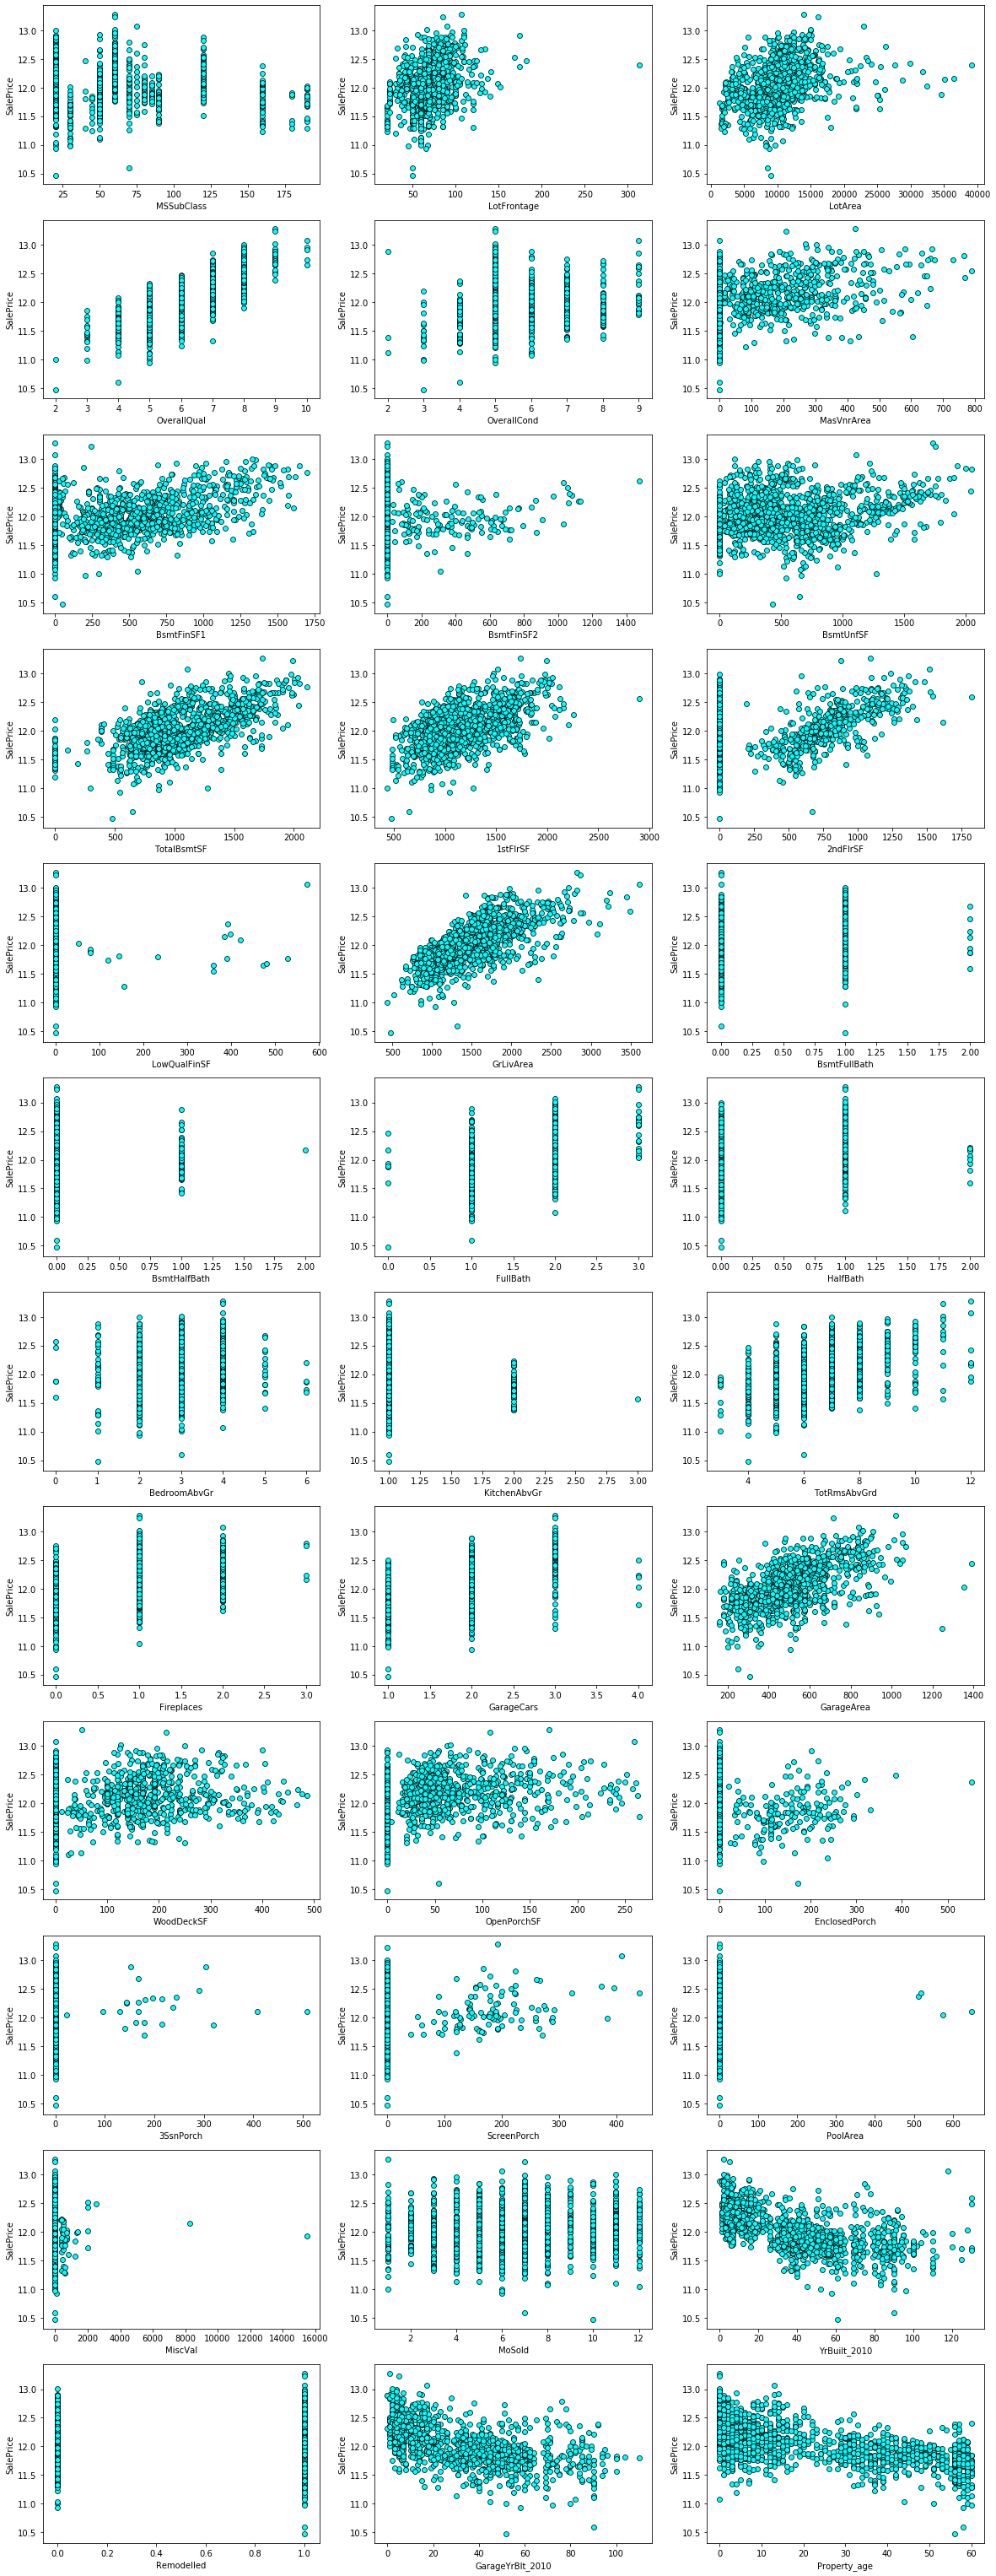

In [286]:
# Plotting Numerical columns with Target variable SalePrice

plt.figure(figsize = (20, 60))
f = num_Hou.columns[1:]
for  i in enumerate(f):
    plt.subplot(13,3,i[0]+1)
    sns.scatterplot(x = num_Hou[i[1]],y = Housing['SalePrice'], color='cyan', edgecolor = 'black')

In [287]:
# Selecting object columns
obj_Hou = Housing.select_dtypes(include = 'object')
obj_Hou.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,WD,Normal


In [ ]:
# Plotting the Categorical columns with target variable SalePrice

plt.figure(figsize = (20, 80))
f = obj_Hou.columns
for i in enumerate(f):
    plt.subplot(12,2,i[0]+1)
    sns.barplot(x = obj_Hou[i[1]],y = Housing['SalePrice'], color='cyan', edgecolor = 'black')
    plt.xticks(rotation = 90)

 ### 3.2 Plotting Correlation

In [ ]:
# Plotting correlation between variables

round(Housing.corr(),2)

In [ ]:
plt.figure(figsize = (30, 20))
sns.heatmap(round(Housing.corr(),2), annot = True, cmap="Greens")
plt.show()

### Inferences:

- TotRmsAbvGrd and GrLivArea show 82% correlation.
- Garage Area and Garage Cars show 84% correlation.
- GarageYrBlt_2010 and YrBuilt_2010 show 83% correlation.

## 4. Data Preparation

In [ ]:
Housing.head()

In [ ]:
Housing['MasVnrType'].value_counts()

In [ ]:
# Converting Categorical data into numerical data

Cate_col = Housing.select_dtypes(include = 'object')
Cate_col.columns

In [ ]:
# Here Some values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

# Column 'MSZoning'

MSZoning = pd.get_dummies(Housing['MSZoning'], prefix='MSZoning', drop_first = True)

Housing = pd.concat([Housing, MSZoning], axis = 1)

# Column 'Lotshape'

Housing['LotShape'] = Housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})

# Column 'LandContour'

Housing['LandContour'] = Housing['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})

# Column 'LotConfig'

Housing['LotConfig'] = Housing['LotConfig'].map({'Inside': 4, 'Corner': 3, 'CulDSac': 2, 'FR2': 1, 'FR3': 0})

# Column 'Neighborhood'

Neighborhood = pd.get_dummies(Housing['Neighborhood'], prefix='Neighborhood', drop_first = True)

Housing = pd.concat([Housing, Neighborhood], axis = 1)


In [ ]:
Housing.head()

In [ ]:
# Column 'Condition1'

Housing['Condition1'] = Housing['Condition1'].map({'Norm': 8, 'Feedr': 7, 'Artery': 6,
                                                   'RRAn': 5, 'PosN' : 4, 'RRAe' : 3,
                                                   'PosA': 2, 'RRNn' : 1, 'RRNe' : 0})

# Column 'BldgType'

Housing['BldgType'] = Housing['BldgType'].map({'Twnhs': 4, 'TwnhsE': 3, 'Duplex': 2, '2fmCon': 1, '1Fam': 0})


# Column 'HouseStyle'

Housing['HouseStyle'] = Housing['HouseStyle'].map({'SLvl': 7, 'SFoyer': 6, '2.5Fin': 5, '2.5Unf': 4, '2Story': 3, 
                                                                 '1.5Fin': 2, '1.5Unf': 1, '1Story': 0})

# Column 'RoofStyle'

RoofStyle = pd.get_dummies(Housing['RoofStyle'], prefix='RoofStyle', drop_first = True)

Housing = pd.concat([Housing, RoofStyle], axis = 1)


# Column 'Exterior1st'

Exterior1st = pd.get_dummies(Housing['Exterior1st'], prefix='Exterior1st', drop_first = True)

Housing = pd.concat([Housing, Exterior1st], axis = 1)


In [ ]:
Housing.head()

In [ ]:
# Column 'Exterior2nd'

Exterior2nd = pd.get_dummies(Housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)

Housing = pd.concat([Housing, Exterior2nd], axis = 1)

# Column 'MasVnrType'

Housing['MasVnrType'] = Housing['MasVnrType'].map({'BrkCmn': 4, 'BrkFace': 3, 
                                                           'CBlock': 2, 'Stone': 1, 'None': 0 }) 

# Column 'ExterQual'

Housing['ExterQual'] = Housing['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po' : 0})


# Column 'Foundation'

Foundation = pd.get_dummies(Housing['Foundation'], prefix='Foundation', drop_first = True)

Housing = pd.concat([Housing, Foundation], axis = 1)


In [ ]:
Housing.head()

In [ ]:
# Column 'BsmtQual'

Housing['BsmtQual'] = Housing['BsmtQual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})

# Column 'BsmtExposure'

Housing['BsmtExposure'] = Housing['BsmtExposure'].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0})

# Column 'BsmtFinType1'

Housing['BsmtFinType1'] = Housing['BsmtFinType1'].map({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 
                                                                 'Rec': 2, 'LwQ': 1, 'Unf': 0})

# Column 'HeatingQC'

Housing['HeatingQC'] = Housing['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})

# Column 'KitchenQual'

Housing['KitchenQual'] = Housing['KitchenQual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})


In [ ]:
Housing.head()

In [ ]:
# Column 'GarageType'

GarageType = pd.get_dummies(Housing['GarageType'], prefix='GarageType', drop_first = True)

Housing = pd.concat([Housing, GarageType], axis = 1)

# Column 'GarageFinish'

Housing['GarageFinish'] = Housing['GarageFinish'].map({'Fin': 2, 'RFn': 1, 'Unf': 0})

# Column 'SaleType'

Housing['SaleType'] = Housing['SaleType'].map({'WD': 9, 'CWD': 8, 'VWD': 7, 'New': 6, 
                                               'COD': 5, 'Con': 4, 'ConLw': 3, 'ConLI': 2,
                                               'ConLD' : 1, 'Oth': 0})

# Column 'SaleCondition'

Housing['SaleCondition'] = Housing['SaleCondition'].map({'Normal': 5, 'Partial': 4, 'Abnorml': 3, 'Family': 2, 
                                                                   'Alloca': 1, 'AdjLand': 0})

In [ ]:
Housing.head()

In [ ]:
# drop the below columns as we now have new columns derived from these columns

Housing = Housing.drop(['MSZoning','Neighborhood','RoofStyle','Exterior1st',
                        'Exterior2nd','ExterCond','Foundation','GarageType'], axis = 1)
Housing.head()

## 5. Train-Test Split

In [ ]:
# Putting all feature variable to X

X = Housing.drop(['SalePrice'], axis=1)
X.head()

In [ ]:
# Putting response variable to y

y = Housing['SalePrice']
y.head()

In [ ]:
# Split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

### 5.1 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaling the features

from sklearn.preprocessing import scale

cols = X.columns

X = pd.DataFrame(scale(X))

X.columns = cols

X.columns

In [ ]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape

## 6. Recursive Feature Elimination (RFE)

- Here we have 123 features, we will use RFE for high contributing features and select top 50 from it.

In [ ]:
# Importing sklearn module for linear Regression and RFE

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

In [ ]:
lm_1 = LinearRegression()

lm_1.fit(X_train, y_train)

In [ ]:
# Running RFE

rfe = RFE(lm_1,50)

rfe = rfe.fit(X_train, y_train)

rfe

In [ ]:
df_rfe = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), 
                      columns=['Variable', 'rfe_support', 'rfe_ranking'])

df_rfe = df_rfe.loc[df_rfe['rfe_support'] == True]

df_rfe.reset_index(drop=True, inplace=True)

df_rfe

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [ ]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]

X_test =  X_test[X_train.columns]

X_train.shape, X_test.shape

### 7. Model Building and Evaluation

In [ ]:
# list pf alphas

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

In [ ]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

In [ ]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

In [ ]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

In [ ]:
# Check the mean squared error

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, ridge.predict(X_test))

In [ ]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

In [ ]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

### RFE

In [ ]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [ ]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

In [ ]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

### Lasso

In [ ]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

In [ ]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

In [ ]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize = (10,5))

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

In [ ]:
# check the coefficient values with lambda = 0.0004

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

In [ ]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

In [ ]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

In [ ]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

In [ ]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)
rfe

In [ ]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

In [ ]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(10,10))
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()